# Universielle RRS funksjoner for RRS. H1 vs H2 vs Ecolight med AC korreksjon

## Imports

In [1]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 
import pandas as pd

funksjoner_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'funksjoner'))
if funksjoner_path not in sys.path:
    sys.path.append(funksjoner_path)

#import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac
import universal_funkjsoner as uf

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = "../data/" ## filene hentes fra en mappe over der vi er nå

hei fra utformet bedre :)


In [2]:
#importlib.reload(f)
importlib.reload(ac)
importlib.reload(atm_c)
importlib.reload(uf)

hei fra utformet bedre :)


<module 'universal_funkjsoner' from '/home/itk/Documents/AnneMarthe/Master/Hypso_H1_H2/funksjoner/universal_funkjsoner.py'>

## Data uploading

In [3]:
frohavet_path_0316 = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1a.nc")
frohavet_path_0316_b = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1b.nc")
frohavet_path_0316_c = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1c.nc")
frohavet_path_0316_d = os.path.join(dir_path, "frohavet_2023-03-16T10-44-08Z-l1d.nc")

satobj_h1 = Hypso1( path = frohavet_path_0316, verbose = True )

l1a_cube = satobj_h1.l1a_cube
l1b_cube = Hypso1( path = frohavet_path_0316_b, verbose = True )
l1c_cube = Hypso1( path = frohavet_path_0316_c, verbose = True )
l1d_cube = Hypso1( path = frohavet_path_0316_d, verbose = True )

l1c_cube = l1c_cube.l1c_cube
l1b_cube = l1b_cube.l1b_cube
l1d_cube = l1d_cube.l1d_cube

satobj_h1.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-16T10-44-08Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1678962780.000000 to 1678963680.000000
[INFO] Frame time range: 1678963448.503009 to 1678963491.912100
[INFO] 173 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [4]:
frohavet_path_0328 = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1a.nc")
frohavet_path_0328_b = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1b.nc")
frohavet_path_0328_c = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1c.nc")
frohavet_path_0328_d = os.path.join(dir_path, "frohavet_2023-03-28T10-59-21Z-l1d.nc")

satobj_h1_0328 = Hypso1( path = frohavet_path_0328, verbose = True )

l1a_cube_0328 = satobj_h1_0328.l1a_cube
l1b_cube_0328 = Hypso1( path = frohavet_path_0328_b, verbose = True )
l1c_cube_0328 = Hypso1( path = frohavet_path_0328_c, verbose = True )
l1d_cube_0328 = Hypso1( path = frohavet_path_0328_d, verbose = True )

l1c_cube_0328 = l1c_cube_0328.l1c_cube
l1b_cube_0328 = l1b_cube_0328.l1b_cube
l1d_cube_0328 = l1d_cube_0328.l1d_cube

satobj_h1_0328.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-28T10-59-21Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1837
[INFO] ADCS time range: 1680000480.000000 to 1680001440.000000
[INFO] Frame time range: 1680001161.388534 to 1680001204.797625
[INFO] 174 sample(s) inside frame time range
[INFO] Interpolating 956 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometr

In [ ]:
frohavet_path_0329 = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1a.nc")
frohavet_path_0329_b = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1b.nc")
frohavet_path_0329_c = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1c.nc")
frohavet_path_0329_d = os.path.join(dir_path, "frohavet_2023-03-29T10-44-51Z-l1d.nc")

satobj_h1_0329 = Hypso1( path = frohavet_path_0329, verbose = True )

l1a_cube_0329 = satobj_h1_0329.l1a_cube
l1b_cube_0329 = Hypso1( path = frohavet_path_0329_b, verbose = True )
l1c_cube_0329 = Hypso1( path = frohavet_path_0329_c, verbose = True )
l1d_cube_0329 = Hypso1( path = frohavet_path_0329_d, verbose = True )

l1c_cube_0329 = l1c_cube_0329.l1c_cube
l1b_cube_0329 = l1b_cube_0329.l1b_cube
l1d_cube_0329 = l1d_cube_0329.l1d_cube

satobj_h1_0329.run_direct_georeferencing()

[INFO] Loading L1a capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1b capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1c capture frohavet_2023-03-29T10-44-51Z
[INFO] Capture spatial dimensions: (956, 684)
[INFO] Capture capture type: nominal
[INFO] Loading L1d capture frohavet_2023-03-29T10-44-51Z


In [ ]:
fro_230330 = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1a.nc")
fro_230330_b = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1b.nc")
fro_230330_c = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1c.nc")
fro_230330_d = os.path.join(dir_path, "frohavet_2023-03-30T10-30-26Z-l1d.nc")

satobj_h1_230330 = Hypso1( path = fro_230330, verbose = True )

l1a_cube_230330 = satobj_h1_230330.l1a_cube
l1b_cube_230330 = Hypso1( path = fro_230330_b, verbose = True )
l1c_cube_230330 = Hypso1( path = fro_230330_c, verbose = True )
l1d_cube_230330 = Hypso1( path = fro_230330_d, verbose = True )

l1c_cube_230330 = l1c_cube_230330.l1c_cube
l1b_cube_230330 = l1b_cube_230330.l1b_cube
l1d_cube_230330 = l1d_cube_230330.l1d_cube

satobj_h1_230330.run_direct_georeferencing() # in order to get the longiyudes and latitudes

[INFO] Loading L1a capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-03-30T10-30-26Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1921
[INFO] ADCS time range: 1680171540.000000 to 1680172458.250000
[INFO] Frame time range: 1680172226.731407 to 1680172276.481407
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

KeyboardInterrupt: 

## Target lat long

In [ ]:
#wl = satobj_h1_25_0511.wavelengths[9:118]
x_123 = [387.84749685, 391.40406599, 394.95941579, 398.51354623, 402.06645732, 405.61814905, 409.16862143, 412.71787446, 416.26590814, 419.81272246, 423.35831743, 426.90269305, 430.44584931, 433.98778622, 437.52850378, 441.06800198, 444.60628083, 448.14334033, 451.67918047, 455.21380126, 458.7472027, 462.27938479, 465.81034752, 469.3400909 , 472.86861492,476.3959196 , 479.92200491, 483.44687088, 486.97051749, 490.49294475,494.01415266, 497.53414122, 501.05291042, 504.57046026, 508.08679076,511.6019019 , 515.11579369, 518.62846612, 522.13991921, 525.65015294,529.15916731, 532.66696233, 536.173538  , 539.67889432, 543.18303128,546.68594889, 550.18764715, 553.68812606, 557.18738561, 560.68542581,564.18224665, 567.67784814, 571.17223028, 574.66539307, 578.1573365, 581.64806058, 585.1375653 , 588.62585068, 592.1129167 , 595.59876336,599.08339068, 602.56679864, 606.04898725, 609.5299565 , 613.0097064 ,616.48823695, 619.96554815, 623.44163999, 626.91651248, 630.39016561,633.86259939, 637.33381382, 640.8038089 , 644.27258462, 647.74014099,651.20647801, 654.67159568, 658.13549399, 661.59817294, 665.05963255,668.5198728 , 671.9788937 , 675.43669524, 678.89327744, 682.34864028,685.80278376, 689.25570789, 692.70741267, 696.1578981 , 699.60716418,703.0552109 , 706.50203826, 709.94764628, 713.39203494, 716.83520425,720.2771542 , 723.7178848 , 727.15739605, 730.59568795, 734.03276049,737.46861368, 740.90324752, 744.336662  , 747.76885713, 751.19983291,754.62958933, 758.0581264 , 761.48544412, 764.91154248, 768.33642149,771.76008115, 775.18252146, 778.60374241, 782.02374401, 785.44252625,788.86008915, 792.27643269, 795.69155687, 799.10546171, 802.51814719]
wl = x_123[9:118]

#target_lat_6 = [64.20992561747796,64.48557437461893,64.52896641587218,  64.22009411667561] #område 7  #må du flytte det tredje koorrdinatet fram her 
#target_lon_6 = [9.704720121565003,9.886201113342556, 8.708294855080245,8.73032214102829]  ## for at det skal blir rett med det nnye inramminga av piksler.

#target_lat_5 = [63.896904083590066,64.17324887890479,64.11631446557637,  63.887923483169004] #område 6.1 ## prøvd å flytte korordinat 3 frem her :))
#target_lon_5 = [9.578289180688513,9.582148298814932,8.924448409066027,  8.96230357578283]
target_lat_6 = [64.152913,64.254748,64.280744,  64.145967]
target_lon_6 = [9.500527 ,9.579630 , 9.258824 ,  9.242894 -0.25]  

target_lat_5 = [63.856648, 63.959085, 63.949196,  63.853017]
target_lon_5 = [9.500427, 9.415833, 9.148865,  9.154358]

target_lat_3 = [63.65192496143867,63.818490304354434,63.793837321385155,  63.660555970548074] #område 2.1.
target_lon_3 = [9.526455044589706,9.531415429238418, 9.442656298818237,9.439764451470932]

target_lat_2 = [63.47865598622861,63.646767083517425,63.61771951990031,  63.42721372576498] #område 5.1
target_lon_2 = [10.061035990832918,9.804697410334523, 9.723689711502818,9.982929114384596]  

target_lat_1 = [63.44802428401152,63.52676744792975, 63.55113867486421,  63.46332195091103] #område 8 
target_lon_1 = [10.706024496195505,10.726421572030368, 10.227932960954064,  10.211631333282082] 

calibration_lat = [63.642540,63.642540, 63.642540,  63.642540] ##
calibration_long = [9.503311,9.503311, 9.503311,  9.503311]

land_pixel_lat = [63.705331, 63.705331, 63.705331, 63.705331]
land_pixel_long = [9.629517, 9.629517, 9.629517, 9.629517]


In [ ]:
cal_x_0316 = 88
cal_y_0316 = 14

cal_x_0328 = 79
cal_y_0328 = 11

cal_x_0329 = 79
cal_y_0329 = 11

cal_x_0330 = 80
cal_y_0330 = 9

## RRS H1 AC

hei fra utformet bedre :)
Antall piksler i RRS_H1_no_AC: 0


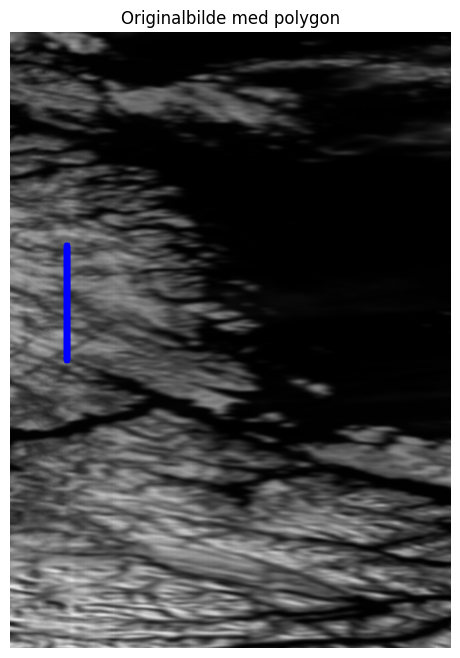

Antall piksler i RRS_H1_no_AC: 541


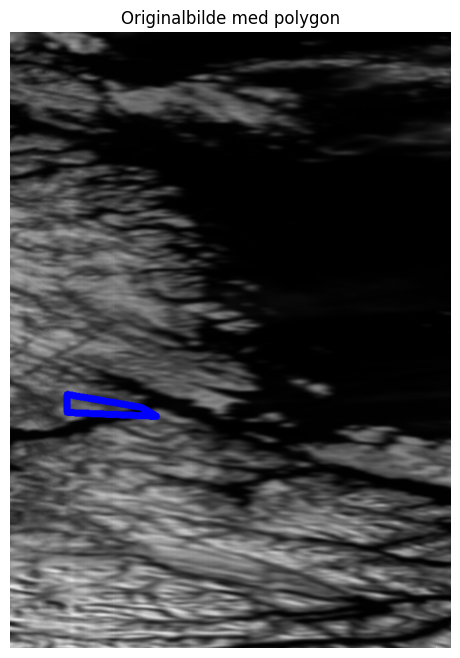

Antall piksler i RRS_H1_no_AC: 2592


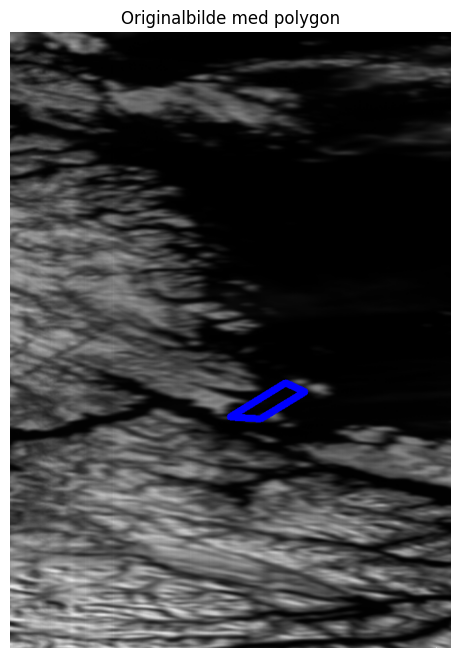

Antall piksler i RRS_H1_no_AC: 6149
this area not calibrated, here is target lat: [63.856648, 63.959085, 63.949196, 63.853017]
Antall piksler i RRS_H1_no_AC: 10347
this area not calibrated, here is target lat: [64.152913, 64.254748, 64.280744, 64.145967]


In [ ]:
importlib.reload(uf)

RRS_NO_AC_H1_250511_A1_16 = uf.automated_RRS_NO_AC_H1(satobj_h1, l1d_cube, target_lat_1, target_lon_1, cal_x_0316, cal_y_0316)
RRS_NO_AC_H1_250511_A2_16 = uf.automated_RRS_NO_AC_H1(satobj_h1, l1d_cube, target_lat_2, target_lon_2, cal_x_0316, cal_y_0316)
RRS_NO_AC_H1_250511_A3_16 = uf.automated_RRS_NO_AC_H1(satobj_h1, l1d_cube, target_lat_3, target_lon_3, cal_x_0316, cal_y_0316)
RRS_NO_AC_H1_250511_A4_16 = uf.automated_RRS_NO_AC_H1(satobj_h1, l1d_cube, target_lat_5, target_lon_5, cal_x_0316, cal_y_0316)
RRS_NO_AC_H1_250511_A5_16 = uf.automated_RRS_NO_AC_H1(satobj_h1, l1d_cube, target_lat_6, target_lon_6, cal_x_0316, cal_y_0316)

In [ ]:
RRS_median_H1_NO_AC_A1_16 = np.median(RRS_NO_AC_H1_250511_A1_16, axis=0)
RRS_median_H1_NO_AC_A2_16 = np.median(RRS_NO_AC_H1_250511_A2_16, axis=0)
RRS_median_H1_NO_AC_A3_16 = np.median(RRS_NO_AC_H1_250511_A3_16, axis=0)
RRS_median_H1_NO_AC_A4_16 = np.median(RRS_NO_AC_H1_250511_A4_16, axis=0)
RRS_median_H1_NO_AC_A5_16 = np.median(RRS_NO_AC_H1_250511_A5_16, axis=0)

print(RRS_median_H1_NO_AC_A1_16.shape)

/home/itk/anaconda3/envs/hypso-env/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/itk/anaconda3/envs/hypso-env/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


()


hei fra utformet bedre :)
Antall piksler i RRS_H1_no_AC: 636


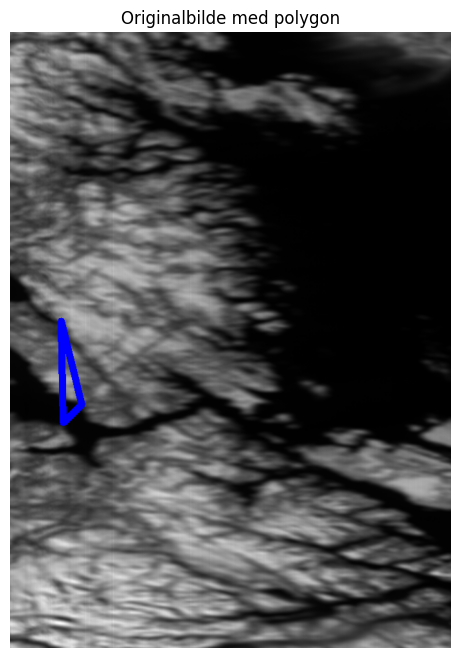

Antall piksler i RRS_H1_no_AC: 2365


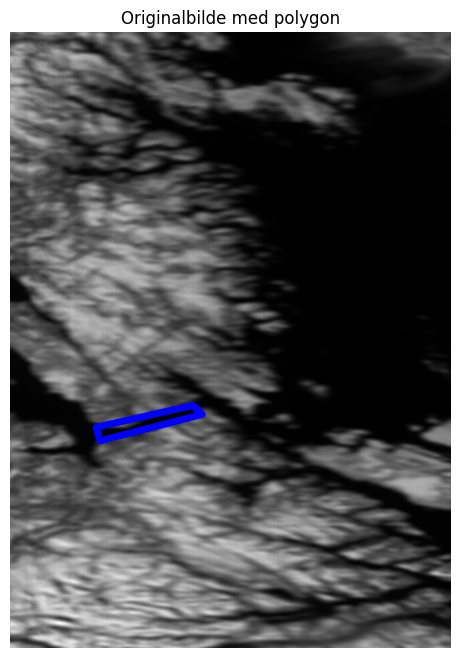

Antall piksler i RRS_H1_no_AC: 1829


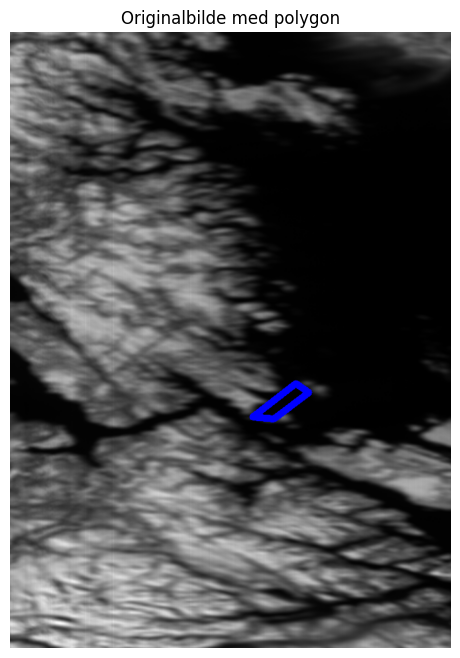

Antall piksler i RRS_H1_no_AC: 4354


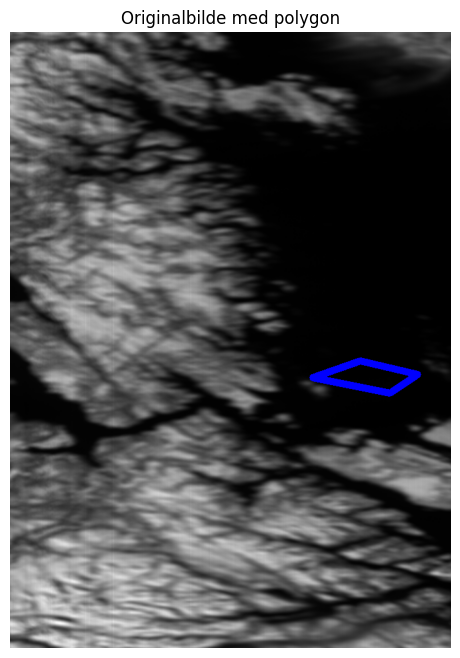

Antall piksler i RRS_H1_no_AC: 7880
this area not calibrated, here is target lat: [64.152913, 64.254748, 64.280744, 64.145967]


In [ ]:
importlib.reload(uf)

RRS_NO_AC_H1_250511_A1_28 = uf.automated_RRS_NO_AC_H1(satobj_h1_0328, l1d_cube_0328, target_lat_1, target_lon_1, cal_x_0328, cal_y_0328)
RRS_NO_AC_H1_250511_A2_28 = uf.automated_RRS_NO_AC_H1(satobj_h1_0328, l1d_cube_0328, target_lat_2, target_lon_2, cal_x_0328, cal_y_0328)
RRS_NO_AC_H1_250511_A3_28 = uf.automated_RRS_NO_AC_H1(satobj_h1_0328, l1d_cube_0328, target_lat_3, target_lon_3, cal_x_0328, cal_y_0328)
RRS_NO_AC_H1_250511_A4_28 = uf.automated_RRS_NO_AC_H1(satobj_h1_0328, l1d_cube_0328, target_lat_5, target_lon_5, cal_x_0328, cal_y_0328)
RRS_NO_AC_H1_250511_A5_28 = uf.automated_RRS_NO_AC_H1(satobj_h1_0328, l1d_cube_0328, target_lat_6, target_lon_6, cal_x_0328, cal_y_0328)

In [ ]:
RRS_median_H1_NO_AC_A1_28 = np.median(RRS_NO_AC_H1_250511_A1_28, axis=0)
RRS_median_H1_NO_AC_A2_28 = np.median(RRS_NO_AC_H1_250511_A2_28, axis=0)
RRS_median_H1_NO_AC_A3_28 = np.median(RRS_NO_AC_H1_250511_A3_28, axis=0)
RRS_median_H1_NO_AC_A4_28 = np.median(RRS_NO_AC_H1_250511_A4_28, axis=0)
RRS_median_H1_NO_AC_A5_28 = np.median(RRS_NO_AC_H1_250511_A5_28, axis=0)

print(RRS_median_H1_NO_AC_A1_28.shape)

(109,)


hei fra utformet bedre :)
Antall piksler i RRS_H1_no_AC: 0


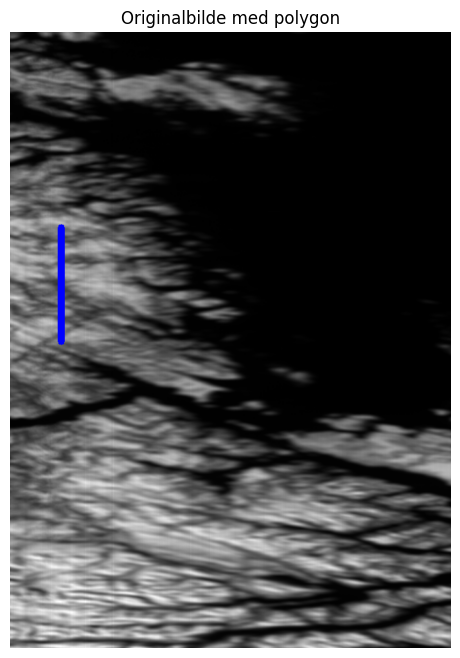

Antall piksler i RRS_H1_no_AC: 419


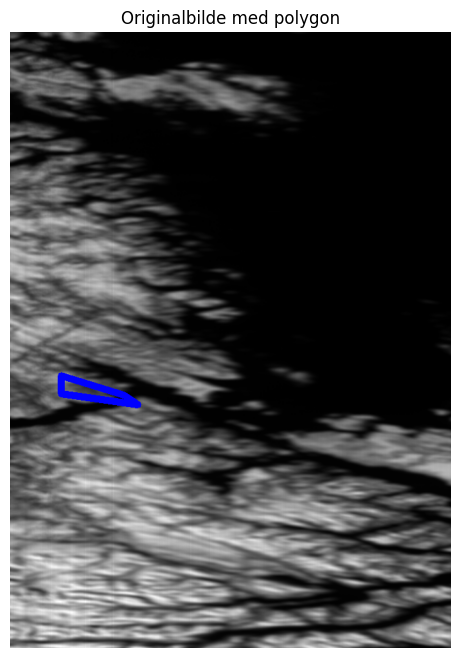

Antall piksler i RRS_H1_no_AC: 2503


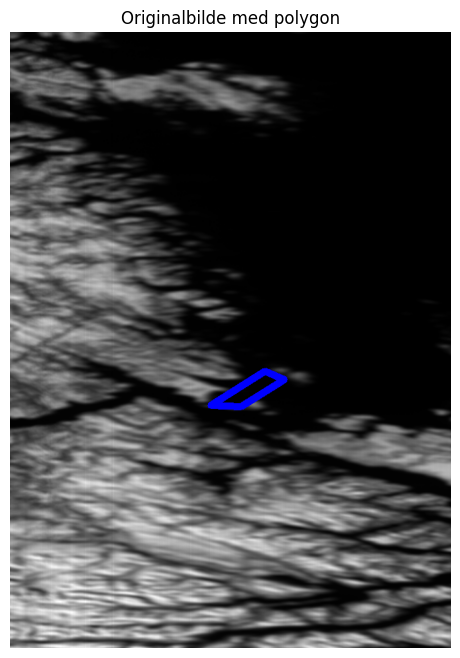

Antall piksler i RRS_H1_no_AC: 6151


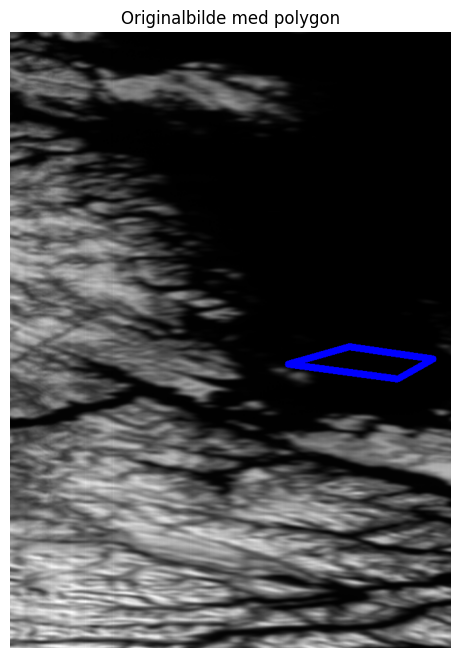

Antall piksler i RRS_H1_no_AC: 11597
this area not calibrated, here is target lat: [64.152913, 64.254748, 64.280744, 64.145967]


In [ ]:
importlib.reload(uf)

RRS_NO_AC_H1_250511_A1_29 = uf.automated_RRS_NO_AC_H1(satobj_h1_0329, l1d_cube_0329, target_lat_1, target_lon_1, cal_x_0329, cal_y_0329)
RRS_NO_AC_H1_250511_A2_29 = uf.automated_RRS_NO_AC_H1(satobj_h1_0329, l1d_cube_0329, target_lat_2, target_lon_2, cal_x_0329, cal_y_0329)
RRS_NO_AC_H1_250511_A3_29 = uf.automated_RRS_NO_AC_H1(satobj_h1_0329, l1d_cube_0329, target_lat_3, target_lon_3, cal_x_0329, cal_y_0329)
RRS_NO_AC_H1_250511_A4_29 = uf.automated_RRS_NO_AC_H1(satobj_h1_0329, l1d_cube_0329, target_lat_5, target_lon_5, cal_x_0329, cal_y_0329)
RRS_NO_AC_H1_250511_A5_29 = uf.automated_RRS_NO_AC_H1(satobj_h1_0329, l1d_cube_0329, target_lat_6, target_lon_6, cal_x_0329, cal_y_0329)

In [ ]:
RRS_median_H1_NO_AC_A1_29 = np.median(RRS_NO_AC_H1_250511_A1_29, axis=0)
RRS_median_H1_NO_AC_A2_29 = np.median(RRS_NO_AC_H1_250511_A2_29, axis=0)
RRS_median_H1_NO_AC_A3_29 = np.median(RRS_NO_AC_H1_250511_A3_29, axis=0)
RRS_median_H1_NO_AC_A4_29 = np.median(RRS_NO_AC_H1_250511_A4_29, axis=0)
RRS_median_H1_NO_AC_A5_29 = np.median(RRS_NO_AC_H1_250511_A5_29, axis=0)

print(RRS_median_H1_NO_AC_A1_29.shape)

()


Antall piksler i RRS_H1_no_AC: 7


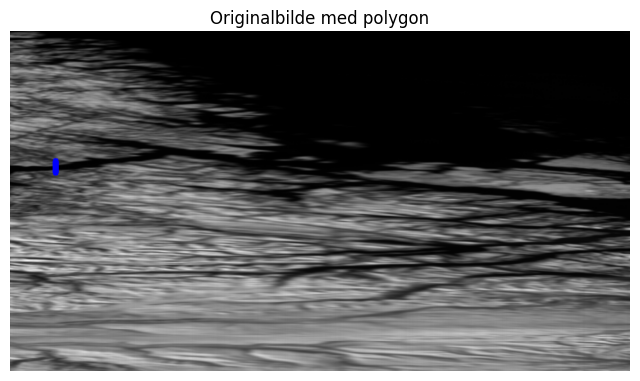

Antall piksler i RRS_H1_no_AC: 1200


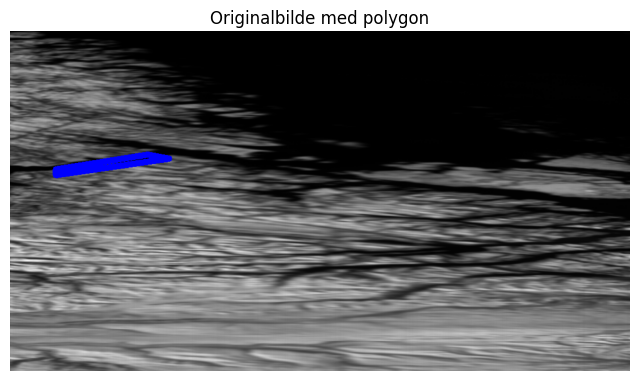

Antall piksler i RRS_H1_no_AC: 1881


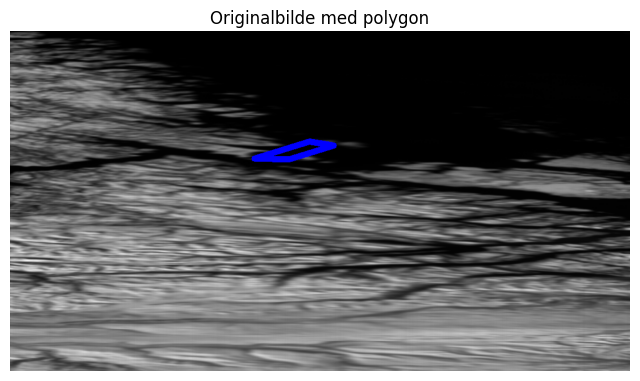

Antall piksler i RRS_H1_no_AC: 4428
this area not calibrated, here is target lat: [63.856648, 63.959085, 63.949196, 63.853017]
Antall piksler i RRS_H1_no_AC: 7323
this area not calibrated, here is target lat: [64.152913, 64.254748, 64.280744, 64.145967]


In [ ]:
RRS_NO_AC_H1_250511_A1_30 = uf.automated_RRS_NO_AC_H1(satobj_h1_230330, l1d_cube_230330, target_lat_1, target_lon_1, cal_x_0330, cal_y_0330)
RRS_NO_AC_H1_250511_A2_30 = uf.automated_RRS_NO_AC_H1(satobj_h1_230330, l1d_cube_230330, target_lat_2, target_lon_2, cal_x_0330, cal_y_0330)
RRS_NO_AC_H1_250511_A3_30 = uf.automated_RRS_NO_AC_H1(satobj_h1_230330, l1d_cube_230330, target_lat_3, target_lon_3, cal_x_0330, cal_y_0330)
RRS_NO_AC_H1_250511_A4_30 = uf.automated_RRS_NO_AC_H1(satobj_h1_230330, l1d_cube_230330, target_lat_5, target_lon_5, cal_x_0330, cal_y_0330)
RRS_NO_AC_H1_250511_A5_30 = uf.automated_RRS_NO_AC_H1(satobj_h1_230330, l1d_cube_230330, target_lat_6, target_lon_6, cal_x_0330, cal_y_0330)

[np.int64(202), np.int64(202), np.int64(202), np.int64(202)]
[np.int64(314), np.int64(314), np.int64(314), np.int64(314)]


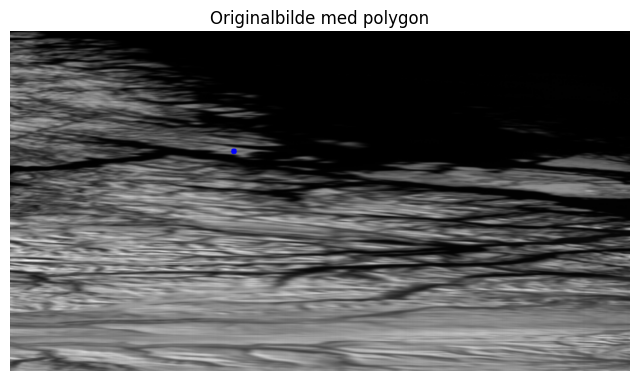

In [ ]:
row_land, col_land = uf.lat_long_to_piksel(land_pixel_lat, land_pixel_long, satobj_h1_230330.latitudes, satobj_h1_230330.longitudes)
print(row_land)
print(col_land)

row_land_calibrated = cal_y_0330 + row_land[1]
col_land_calibrated = cal_x_0330 + col_land[1]

rrs_land = l1d_cube_230330[row_land_calibrated, col_land_calibrated, 9:118]

uf.piksles_to_area_check(row_land, col_land, l1d_cube_230330,cal_x_0330, cal_y_0330)

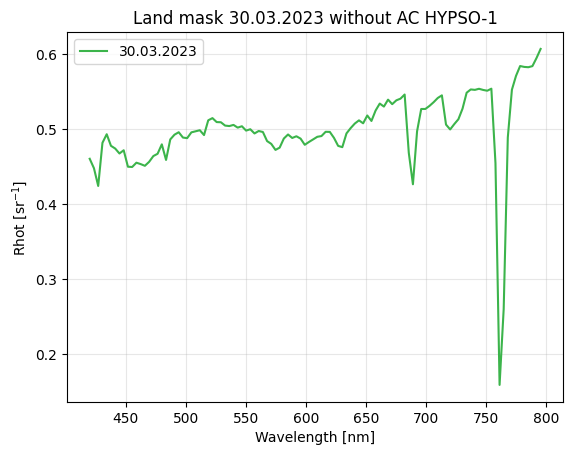

In [ ]:
#print(l1d_cube_230330)

#H1
plt.plot(wl, rrs_land, color="#3cb44b", linestyle= '-', label = '30.03.2023')


plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr$^{-1}$] ") #Er begge water leaving radience???
plt.title("Land Mask H1 Rhot 30.03.2023") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/H1noAC/landmask_300323.pdf', dpi=300, bbox_inches='tight')
plt.show()

## få inn ecolighs her 
## fikse plottings alg, så det er så enkelt å kjapt du kan få det... Fortsette på det du har gjort. Bra jobba
## fikse så du kan vise disse plotsa til Esmée i morgen så hu kan lage flere ulike til torsdag :)) Da dette kan diskuteres med Morten

In [ ]:
RRS_median_H1_NO_AC_A1_30 = np.median(RRS_NO_AC_H1_250511_A1_30, axis=0)
RRS_median_H1_NO_AC_A2_30 = np.median(RRS_NO_AC_H1_250511_A2_30, axis=0)
RRS_median_H1_NO_AC_A3_30 = np.median(RRS_NO_AC_H1_250511_A3_30, axis=0)
RRS_median_H1_NO_AC_A4_30 = np.median(RRS_NO_AC_H1_250511_A4_30, axis=0)
RRS_median_H1_NO_AC_A5_30 = np.median(RRS_NO_AC_H1_250511_A5_30, axis=0)

print(RRS_median_H1_NO_AC_A1_30.shape)

(109,)


## EnMap

[0.04241166 0.03892191 0.03375243 0.0356451  0.03629308 0.03697119
 0.03809731 0.03717887 0.03582325 0.03528757 0.03380524 0.0327652
 0.03135816 0.02981822 0.02719226 0.02744591 0.0265333  0.02438694
 0.02382993 0.02283388 0.02080827 0.02045441 0.02025015 0.01943745
 0.01856804 0.01755336 0.01705634 0.01643518 0.01541965 0.01453512
 0.01397766 0.01305011 0.01256056 0.01220819 0.01138905 0.01089284
 0.01023188 0.00957783 0.00904652 0.00851382 0.00827666 0.0077113
 0.00756565 0.00739466 0.00704078 0.00660782 0.00637932 0.00624057
 0.00601582 0.00581068 0.0050753  0.0046831  0.00480619 0.0046475
 0.00428923 0.00386364 0.00366243 0.00363108 0.00342868 0.00326715
 0.00283555 0.00168156 0.00251969 0.00261318 0.00252564 0.00230699]
(34, 66)


/tmp/ipykernel_138031/2345311034.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


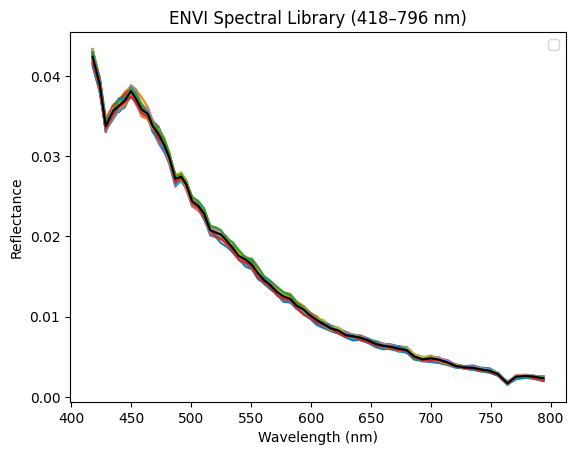

In [ ]:
import spectral
import matplotlib.pyplot as plt
import numpy as np

# Last spektralbiblioteket
spectra = spectral.io.envi.open('../../EnMap/data/noAc_30032023_A3.hdr', '../../EnMap/data/noAc_30032023_A3.sli')
data = spectra.spectra  # (n_spectra x n_bands)

# Hent wavelengths (i µm) og konverter til nm
header = spectral.envi.read_envi_header('../../EnMap/data/noAc_30032023_A3.hdr')
wavelengths_um = header['wavelength']
wavelengths_nm = [float(w) * 1000 for w in wavelengths_um]

# Filtrer basert på ønsket bølgelengdeintervall
min_nm, max_nm = 418, 796
mask = [(w >= min_nm and w <= max_nm) for w in wavelengths_nm]

# Bruk masken til å filtrere både data og wavelengths
filtered_wavelengths = [w for w, m in zip(wavelengths_nm, mask) if m]
filtered_data = data[:, mask]  # Mask langs spektralbånd (aksen 1)

## fikse dette
median_data_EnMap = np.median(np.array(filtered_data), axis = 0)
print(median_data_EnMap)
print(filtered_data.shape)

# Plotting
for i in range(filtered_data.shape[0]):
    plt.plot(filtered_wavelengths, filtered_data[i], )#label=f"Spectrum {i+1}")
plt.plot(filtered_wavelengths, median_data_EnMap, color = "black")

plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance')
plt.title('ENVI Spectral Library (418–796 nm)')
plt.legend()
plt.show()

## Variance

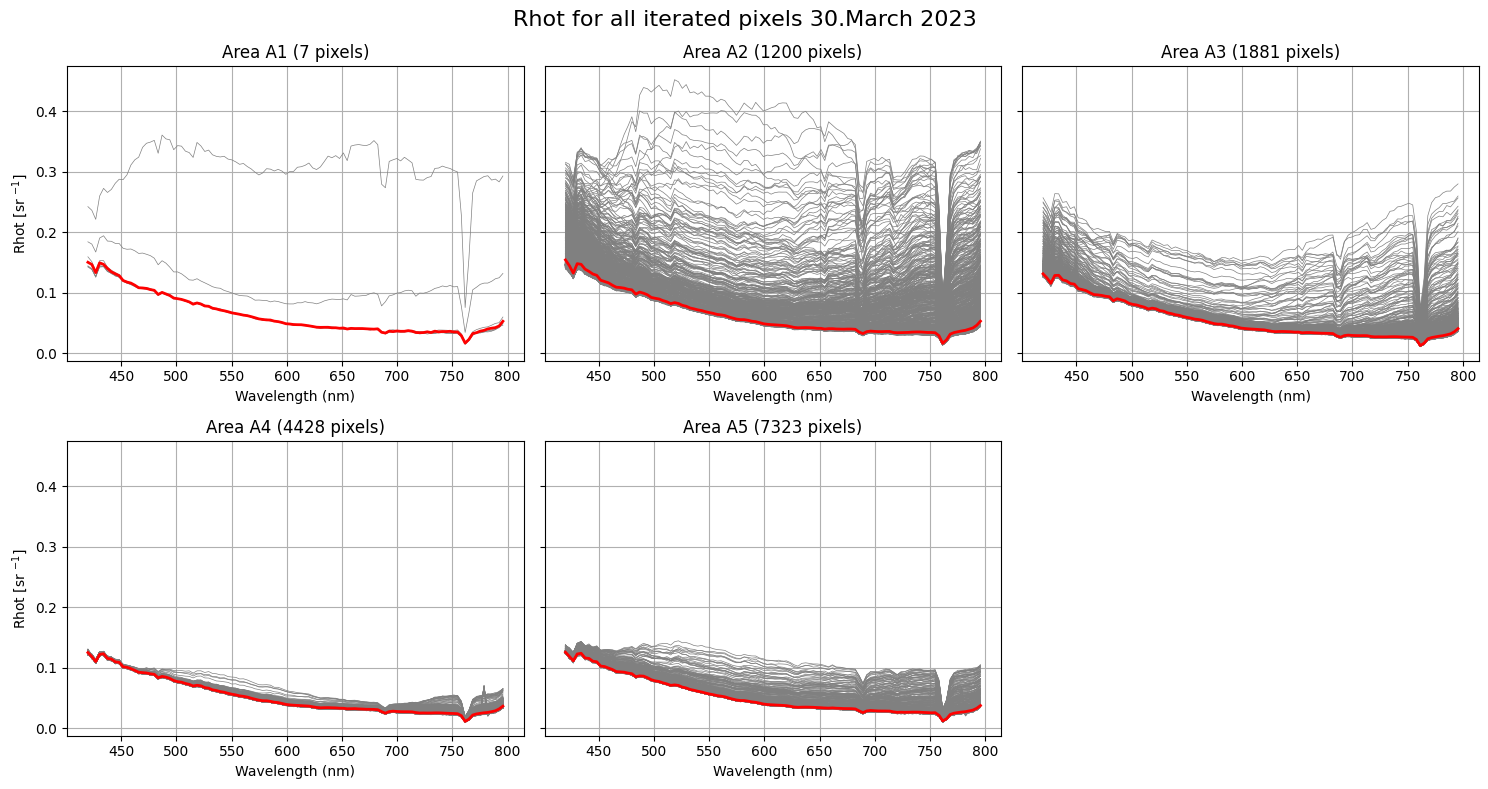

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np

# Define wavelength array (if not already defined)
# Example: wl = np.linspace(400, 700, RRS_NO_AC_H1_250511_A1_30.shape[1])

# Define your data in a dictionary to simplify access
areas = ["A1", "A2", "A3", "A4", "A5"]
data_dict = {
    "A1": (RRS_NO_AC_H1_250511_A1_30, RRS_median_H1_NO_AC_A1_30),
    "A2": (RRS_NO_AC_H1_250511_A2_30, RRS_median_H1_NO_AC_A2_30),
    "A3": (RRS_NO_AC_H1_250511_A3_30, RRS_median_H1_NO_AC_A3_30),
    "A4": (RRS_NO_AC_H1_250511_A4_30, RRS_median_H1_NO_AC_A4_30),
    "A5": (RRS_NO_AC_H1_250511_A5_30, RRS_median_H1_NO_AC_A5_30),
}

# Create the figure and subplots in a 2-row grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=True)
axs = axs.flatten()

for idx, area in enumerate(areas):
    ax = axs[idx]
    spectra, median_rrs = data_dict[area]
    spectra = np.array(spectra)
    n_pixels = spectra.shape[0]

    # Plot individual spectra
    for i in range(n_pixels):
        ax.plot(wl, spectra[i], color='gray', linewidth=0.5)

    # Plot median spectrum
    ax.plot(wl, median_rrs, color='red', linewidth=2)

    # Add area and pixel count to title
    ax.set_title(f"Area {area} ({n_pixels} pixels)")
    ax.set_xlabel("Wavelength (nm)")
    ax.grid(True)

# Set shared Y-axis label on first column
axs[0].set_ylabel(r"Rhot [sr $^{-1}$]")
axs[3].set_ylabel(r"Rhot [sr $^{-1}$]")

# Hide the unused 6th subplot
if len(areas) < len(axs):
    axs[-1].axis("off")

fig.suptitle("Rhot for all iterated pixels 30.March 2023", fontsize=16)


plt.tight_layout()
plt.savefig('../resultater/H1vsH1_variance30.March.pdf', dpi=300, bbox_inches='tight')
plt.show()


## Plot

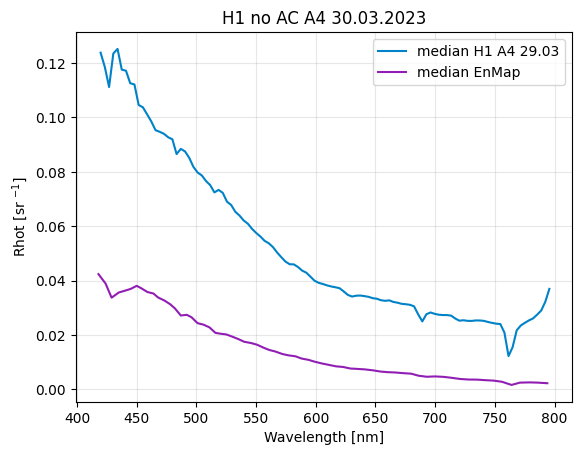

In [ ]:
#H1
##plt.plot(wl, RRS_median_H1_NO_AC_A1_16, color="#e6194b", linestyle= '-',  label='median H1 A1 no AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A2_16, color="#0082c8", linestyle= '-', label = 'median H1 16.03')#label='median H2 A2 no AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_16, color="#0082c8", linestyle= '-', label ='median H1 A3 16.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_16, color="#0082c8", linestyle= '-', )#label='median H1 A4 16.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_16, color="#0082c8", linestyle= '-',  )#label='median H2 A5 no AC')  #marker="o")
#
##H1
#plt.plot(wl, RRS_median_H1_NO_AC_A1_28, color="#2ca02c", linestyle= '-',  label='median H1 28.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A2_28, color="#2ca02c", linestyle= '-', )#label='median H2 A2 AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_28, color="#2ca02c", linestyle= '-', label='median H1 A3 28.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_28, color="#2ca02c", linestyle= '-', label='median H1 A4 28.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_28, color="#2ca02c", linestyle= '-',  )#label='median H2 A5 AC',  marker="o")
#
##H1
##plt.plot(wl, RRS_median_H1_NO_AC_A1_29, color="#e6194b", linestyle= '-',  )#label='median H1 A1  no AC') 
#plt.plot(wl, RRS_median_H1_NO_AC_A2_29, color="#f58231", linestyle= '-', label = "median H1 29.03")#label='median H2 A2  no AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_29, color="#f58231", linestyle= '-', label ='median H1 A3 29.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_29, color="#0082c8", linestyle= '-', label='median H1 A4 29.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_29, color="#f58231", linestyle= '-', )# label='median H2 A5 no  AC') # marker="o")

#H1
#plt.plot(wl, RRS_median_H1_NO_AC_A1_30, color="#e6194b", linestyle= '-', label="median H1 A1" )#label='median H1 A1no  AC')
#plt.plot(wl, RRS_median_H1_NO_AC_A2_30, color="#3cb44b", linestyle= '-', label='median H1 A2')
#plt.plot(wl, RRS_median_H1_NO_AC_A3_30, color="#911eb4", linestyle= '-', label='median H1 A3')
#plt.plot(wl, RRS_median_H1_NO_AC_A4_30, color="#0082c8", linestyle= '-', label='median H1 A4 30.03')
#plt.plot(wl, RRS_median_H1_NO_AC_A5_30, color="#f58231", linestyle= '-', label='median H1 A5')#  marker="o")

# EnMap
#plt.plot(filtered_wavelengths, median_data_EnMap, color = "#911eb4", linestyle= '-', label = "median EnMap")

plt.xlabel("Wavelength [nm]")
plt.ylabel("Rhot [sr $^{-1}$]") #Er begge water leaving radience???
plt.title("H1 no AC A4 30.03.2023") ## bruke AC som Atmosperic Correction 
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../resultater/H1vsEnMAp_noAC_A3_30.pdf', dpi=300, bbox_inches='tight')
plt.show()

## få inn ecolighs her 
## fikse plottings alg, så det er så enkelt å kjapt du kan få det... Fortsette på det du har gjort. Bra jobba
## fikse så du kan vise disse plotsa til Esmée i morgen så hu kan lage flere ulike til torsdag :)) Da dette kan diskuteres med Morten